 Perform the 5 data visualization tasks (given below) on the student performance dataset given in the
link below. Each figure: 800×600 px, 300 DPI, title, labeled axes/units, legend if applicable, readable
ticks.

In [92]:
#read the dataset given from the box
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/mosomo82/Data-Visualisation/refs/heads/main/StudentsPerformance.csv')
df.head(1005)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Perform preprocessing stage or clean the data

In [93]:
# Check for missing values
missing_values = df.isnull().sum()
if missing_values.any():
  print("Missing values found in the dataset.")
  print(missing_values)
  # since the dataset is generall clean and sample dataset size is large enough, I will drop any rows with missing values
  df.dropna(inplace=True)
else:
  print("No missing values found in the dataset.")

# Format the column name for professionalism, clarity and consistency
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.capitalize()

# Create a new column for the overall average score
df['Overall_avg'] = round((df['Math_score'] + df['Reading_score'] + df['Writing_score']) / 3,2)

#Standarize the column Lunch Yes == standard and No == free/reduced, and the column Test_preparation_course Yes == completed and No = none
df['Lunch'] = df['Lunch'].replace({'standard': 'Yes', 'free/reduced': 'No'})
df['Test_preparation_course'] = df['Test_preparation_course'].replace({'completed': 'Yes', 'none': 'No'})

# Output CSV as data_clean
df.to_csv('clean_StudentPerformance.csv', index=False)
print(df.head())


No missing values found in the dataset.
   Gender Race/ethnicity Parental_level_of_education Lunch  \
0  female        group B           bachelor's degree   Yes   
1  female        group C                some college   Yes   
2  female        group B             master's degree   Yes   
3    male        group A          associate's degree    No   
4    male        group C                some college   Yes   

  Test_preparation_course  Math_score  Reading_score  Writing_score  \
0                      No          72             72             74   
1                     Yes          69             90             88   
2                      No          90             95             93   
3                      No          47             57             44   
4                      No          76             78             75   

   Overall_avg  
0        72.67  
1        82.33  
2        92.67  
3        49.33  
4        76.33  


A. V1- — Gender boxplots (math vs reading) a.	Question: Are there gender differences in math vs reading?
b.	Chart: Side‑by‑side boxplots of math score and reading score grouped by gender.


Generating: Gender boxplots (math vs reading)...


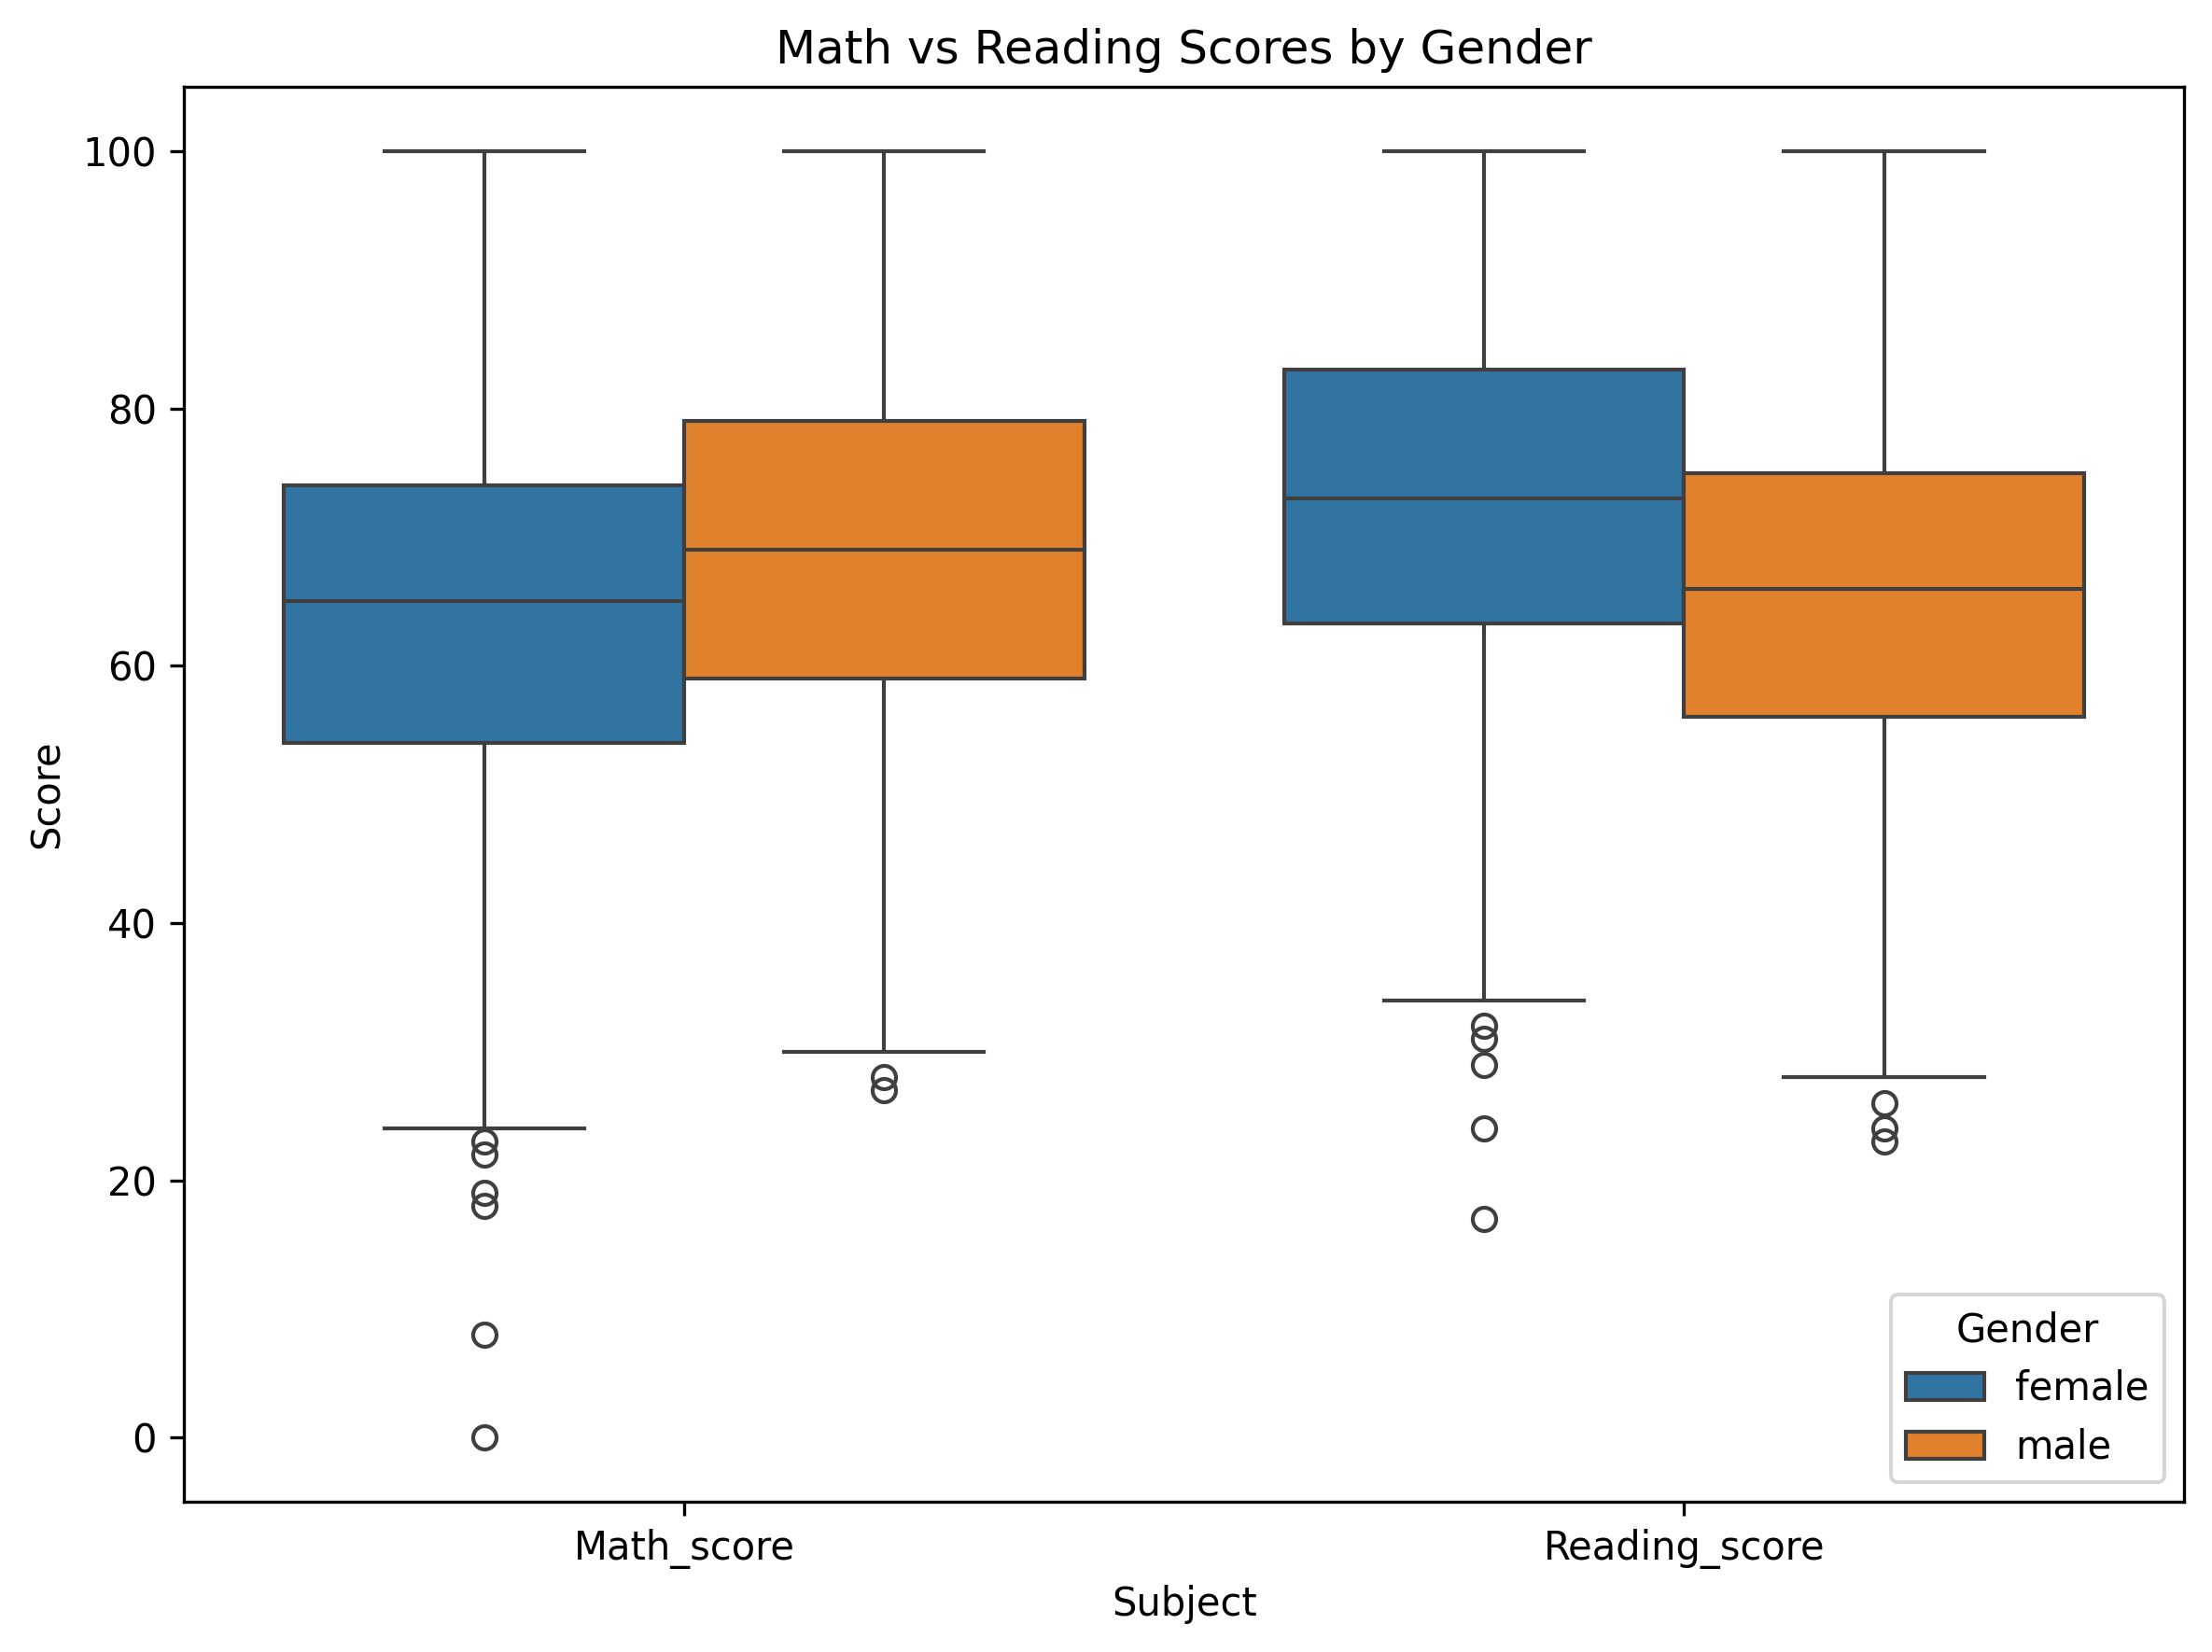

In [108]:
print("Generating: Gender boxplots (math vs reading)...")
plt.figure(figsize=(8, 6), dpi=300)
df_melted = df.melt(id_vars='Gender', value_vars=['Math_score', 'Reading_score'], var_name='Subject', value_name='Score')
sns.boxplot(x='Subject', y='Score', hue='Gender', data=df_melted)
plt.title('Math vs Reading Scores by Gender')
plt.legend(title='Gender', loc='lower right')
plt.tight_layout()
plt.savefig('V1_Gender_Boxplots.png') # Save the figure as V1_Gender_Boxplots.png
plt.show()

B.	V2 — Test prep impact on math
  a.test prep score higher in math?
  b.	Chart: Any chart of your choice for math score by test preparation course (completed vs none).


Generating: Test prep impact on math...


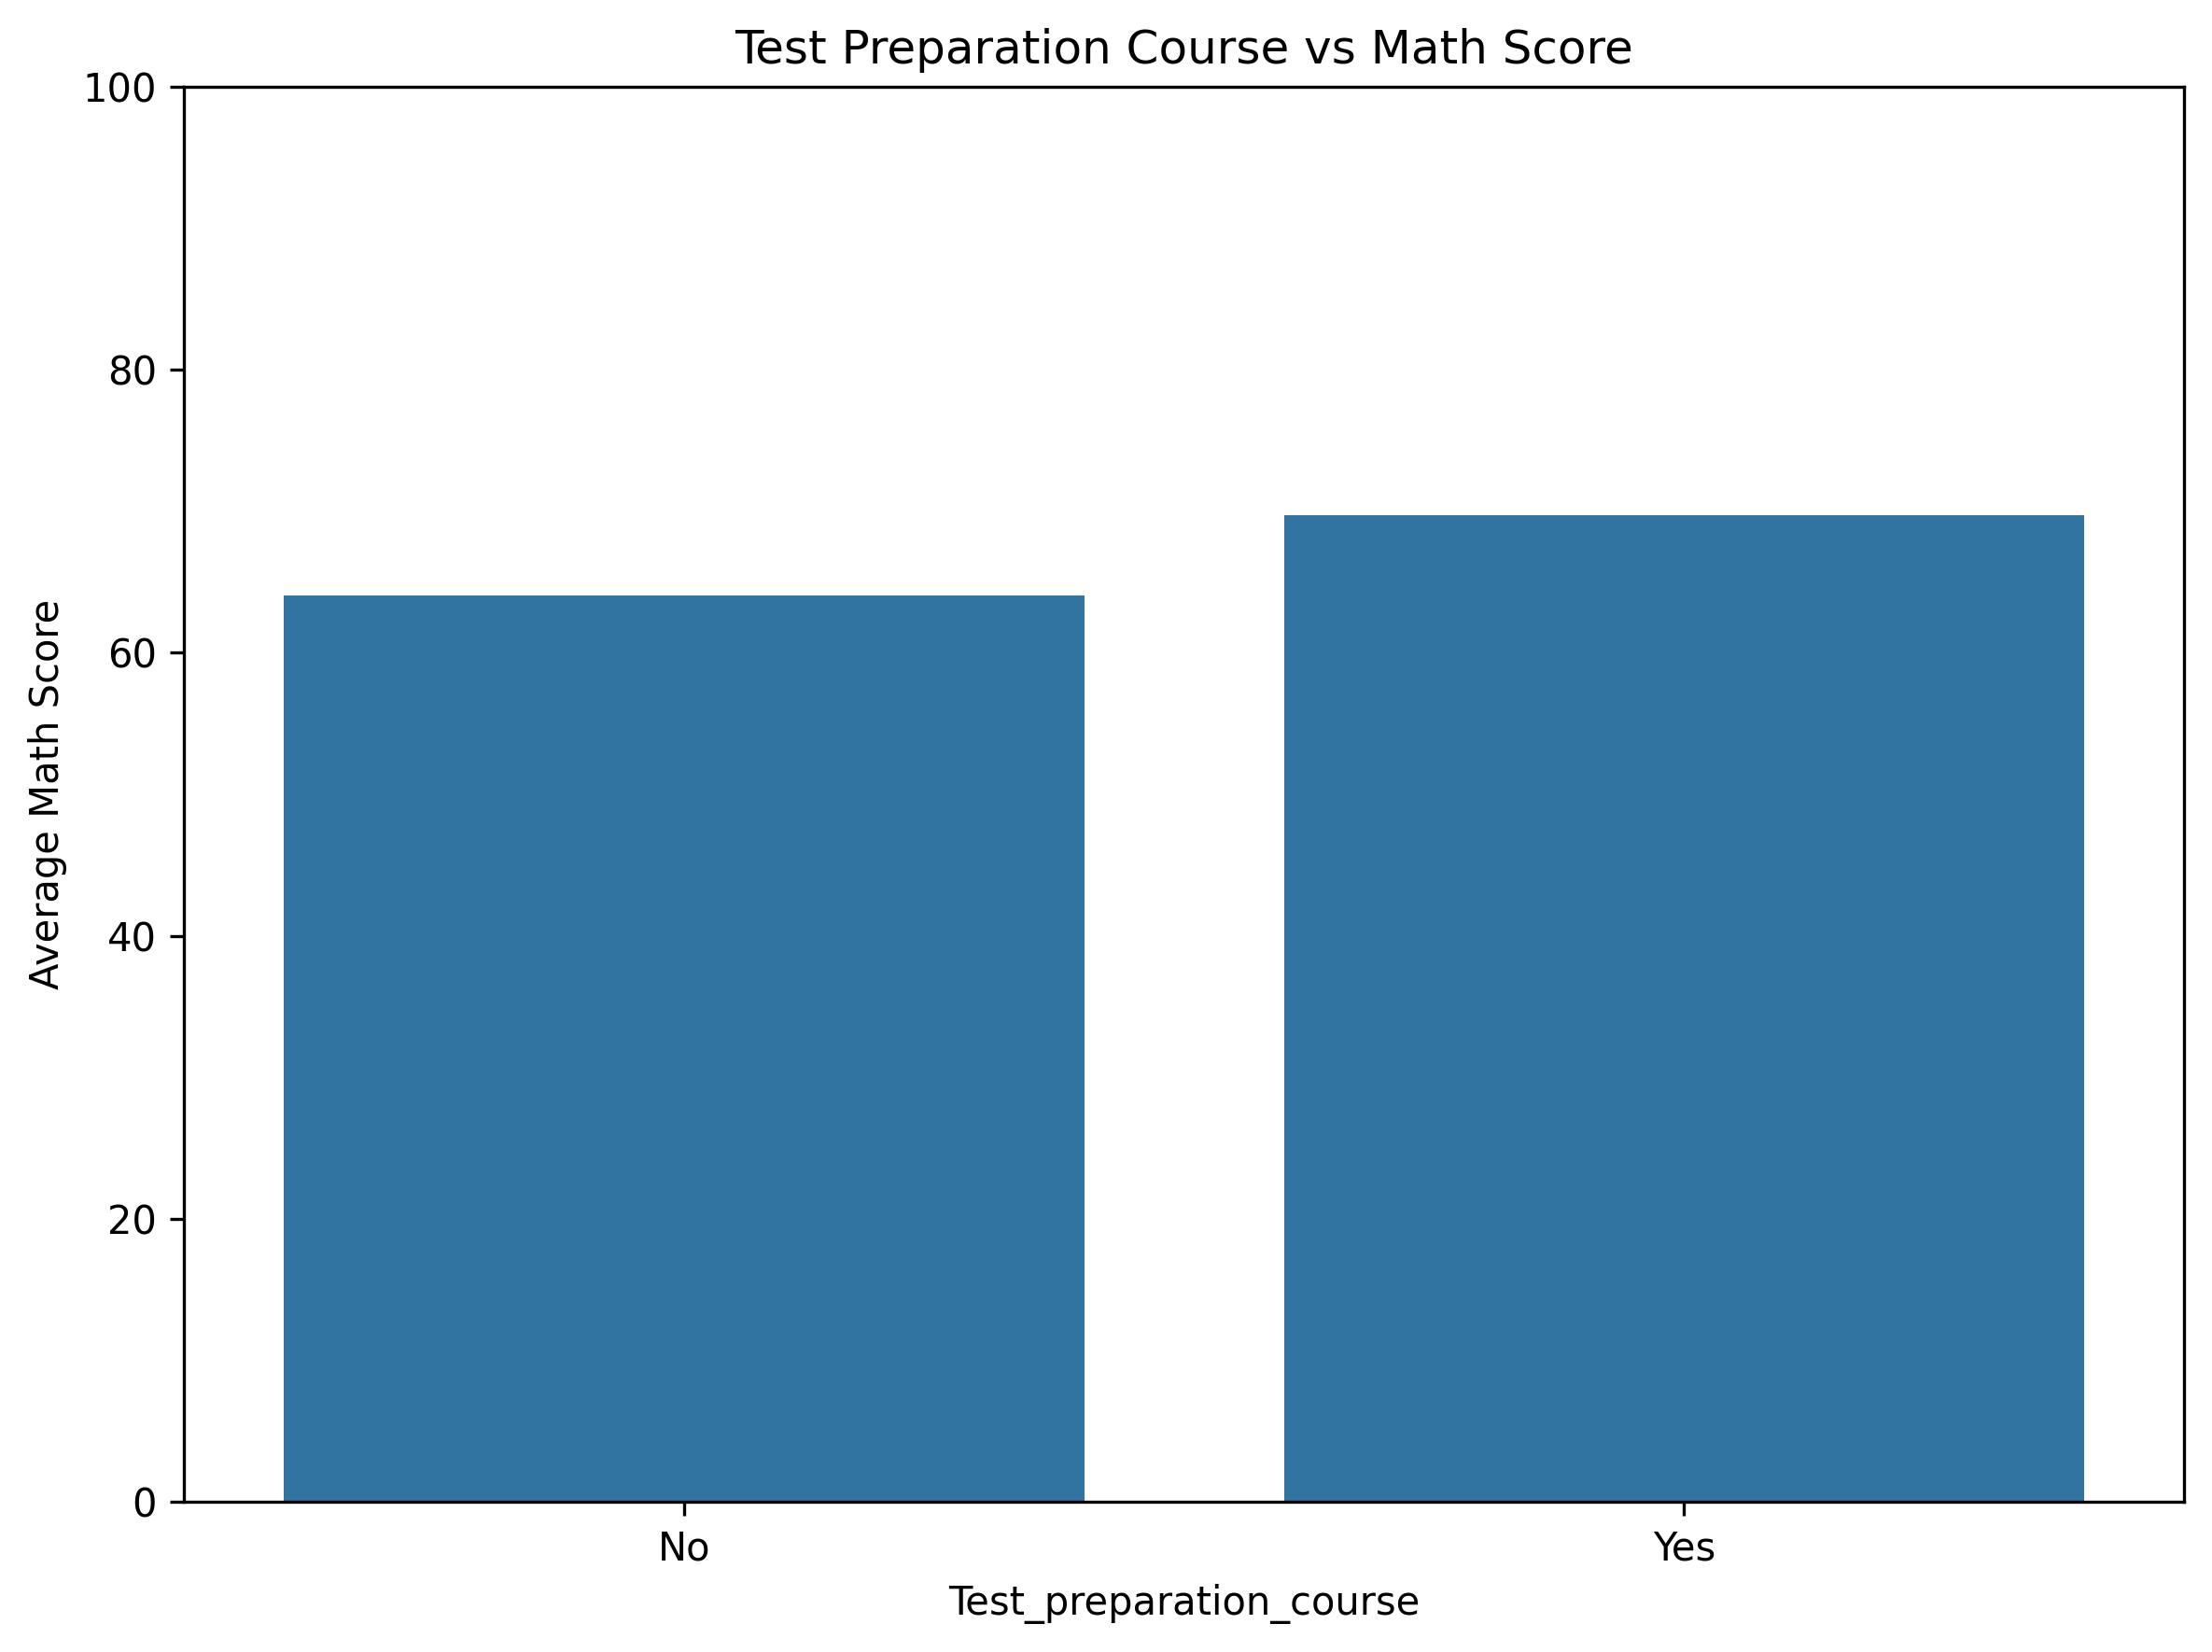

In [95]:
print("Generating: Test prep impact on math...")
plt.figure(figsize=(8, 6), dpi=300)
sns.barplot(x='Test_preparation_course', y='Math_score', data=df, errorbar=None)
plt.title('Test Preparation Course vs Math Score')
plt.ylabel("Average Math Score")
plt.ylim(0,100) # Set a consistent y-axis for better comparison
plt.tight_layout()
plt.savefig('V2_Test_prep_impact_on_math.png') # Save as V2_Test_prep_impact_on_math.png
plt.show()

C.	V3 — Lunch type and average performance
a.	Question: Does lunch type (standard vs free/reduced) relate to outcomes?
b.	Chart: Grouped bar chart of mean overall_avg of all the scores (math, reading, writing) by lunch.

Generating: Lunch type and average performance...


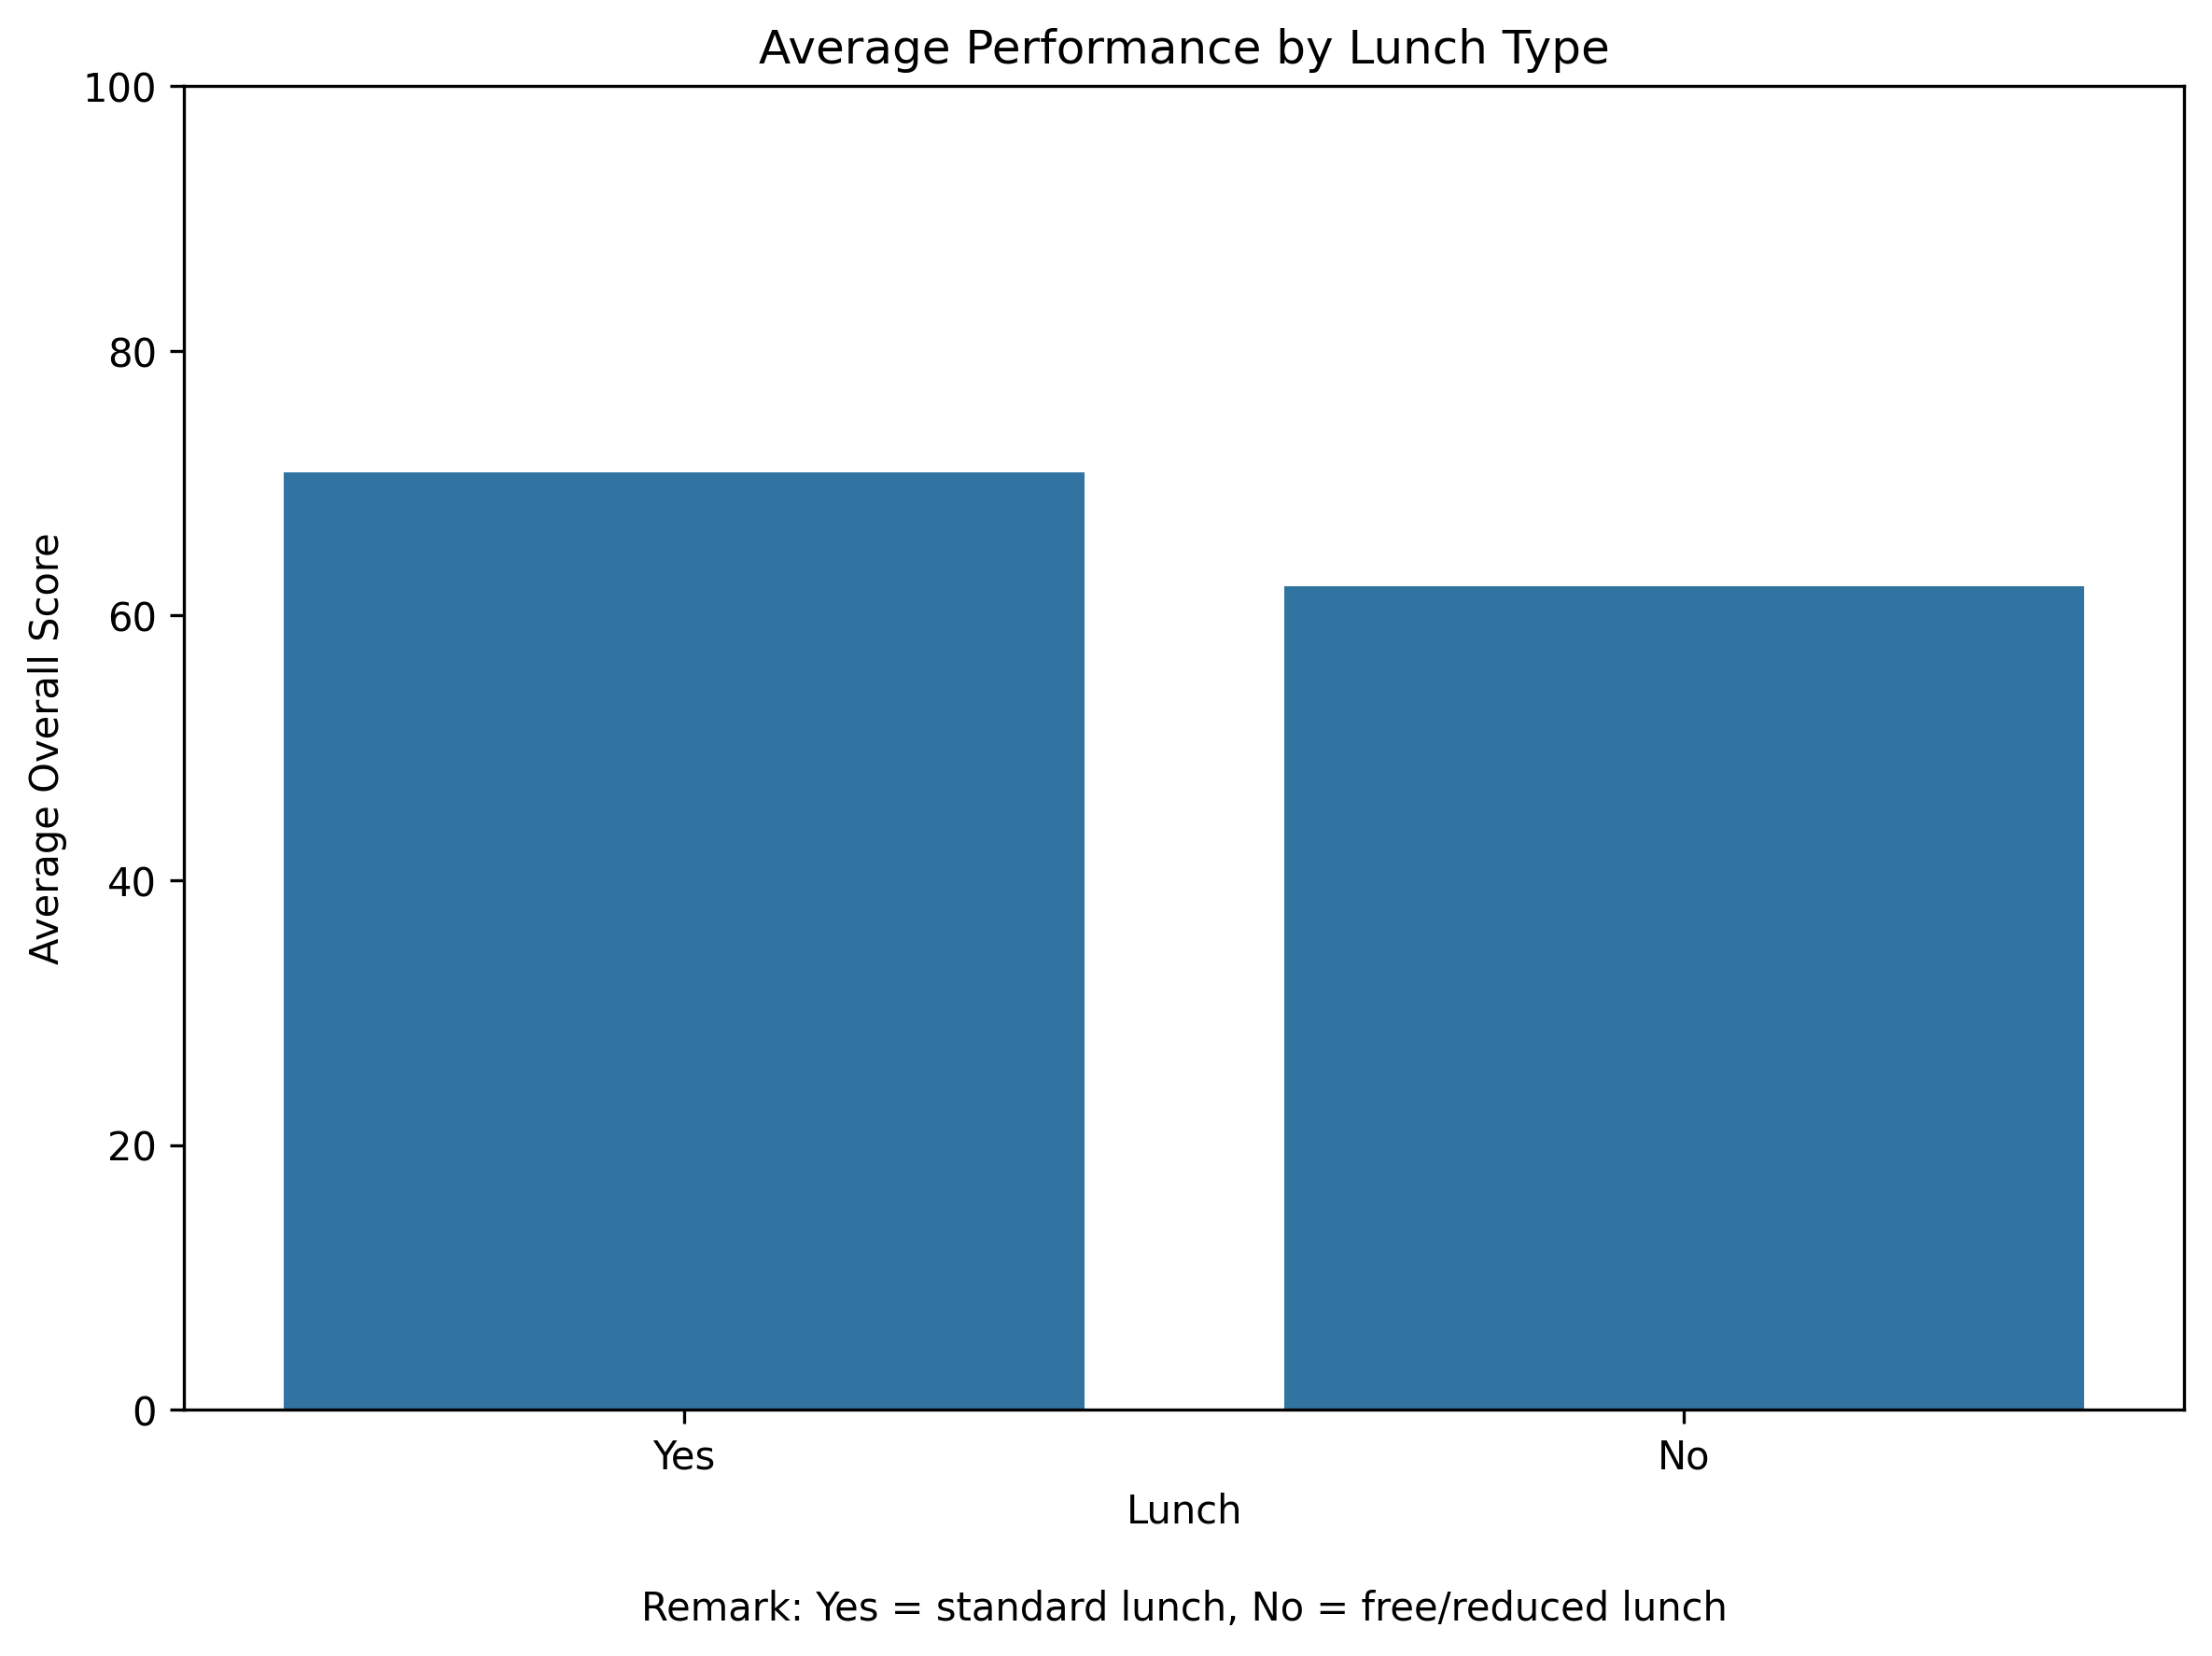

In [96]:
print("Generating: Lunch type and average performance...")
plt.figure(figsize=(8, 6), dpi=300)
sns.barplot(x='Lunch', y='Overall_avg', data=df, errorbar=None)
plt.title('Average Performance by Lunch Type')
plt.ylabel("Average Overall Score")
plt.ylim(0,100) # Set a consistent y-axis for better comparison
plt.text(0.5, -0.15, 'Remark: Yes = standard lunch, No = free/reduced lunch', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.tight_layout()
plt.savefig('V3_Lunch_type_and_average_performance.png') # Save the figure as V3_Lunch_type_and_average_performance.png
plt.show()

D.	V4 — Subject correlations
a.	Question: How strongly do the three subjects move together?
b.	Chart: Correlation heatmap for math, reading, writing with annotated coefficients.


Generating: Subject correlations...


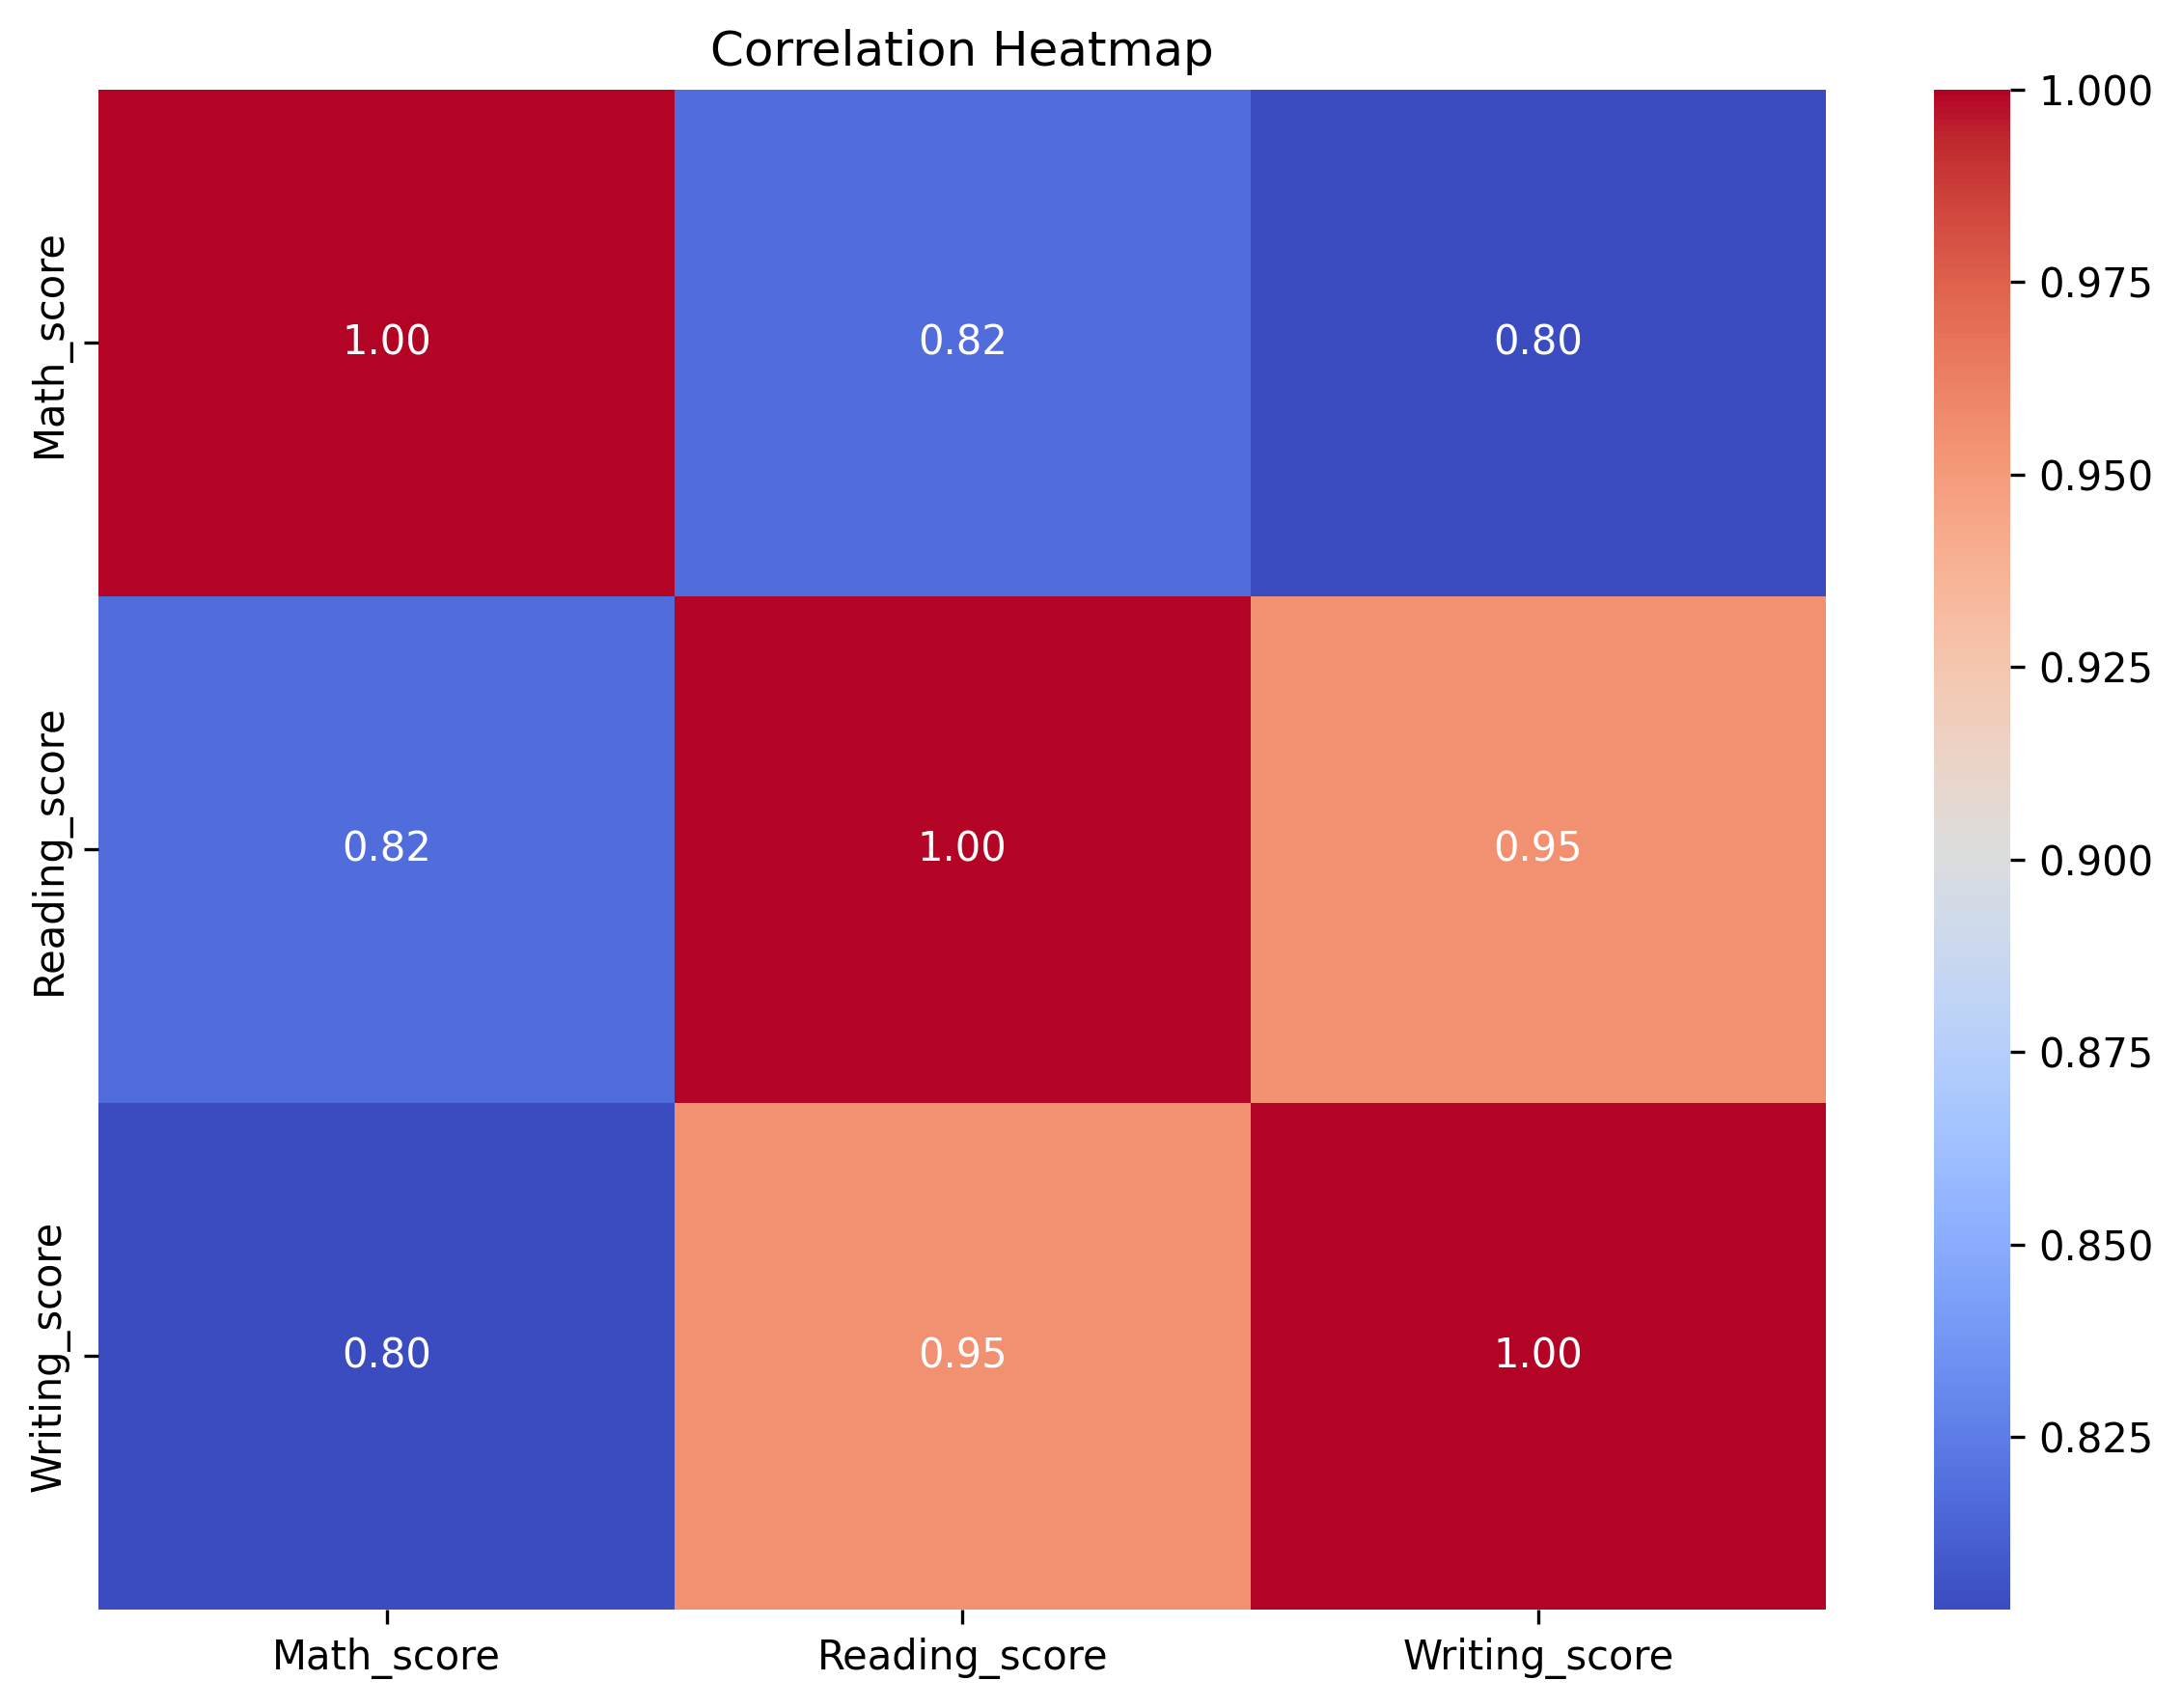

In [97]:
print("Generating: Subject correlations...")
plt.figure(figsize=(8, 6), dpi=300)
correlation_matrix = df[['Math_score', 'Reading_score', 'Writing_score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('V4_Subject_correlations.png') # Save the figure as V4_Subject_correlations.png
plt.show()


E.	V5 — Math vs reading with trend lines by test prep
a.	Question: How strongly are math and reading scores associated, and do students who completed the test‑preparation course have a different slope in the math–reading relationship than those who did not?
b.	Chart: Scatter plot with two straight best‑fit lines (one for each group: completed, none).
i.	X‑axis: reading score
ii.	Y‑axis: math score
c.	Color: Points colored by test preparation course (legend must show the two groups and each group’s n).


Generating: Math vs Reading with Trend Lines by Test Prep...


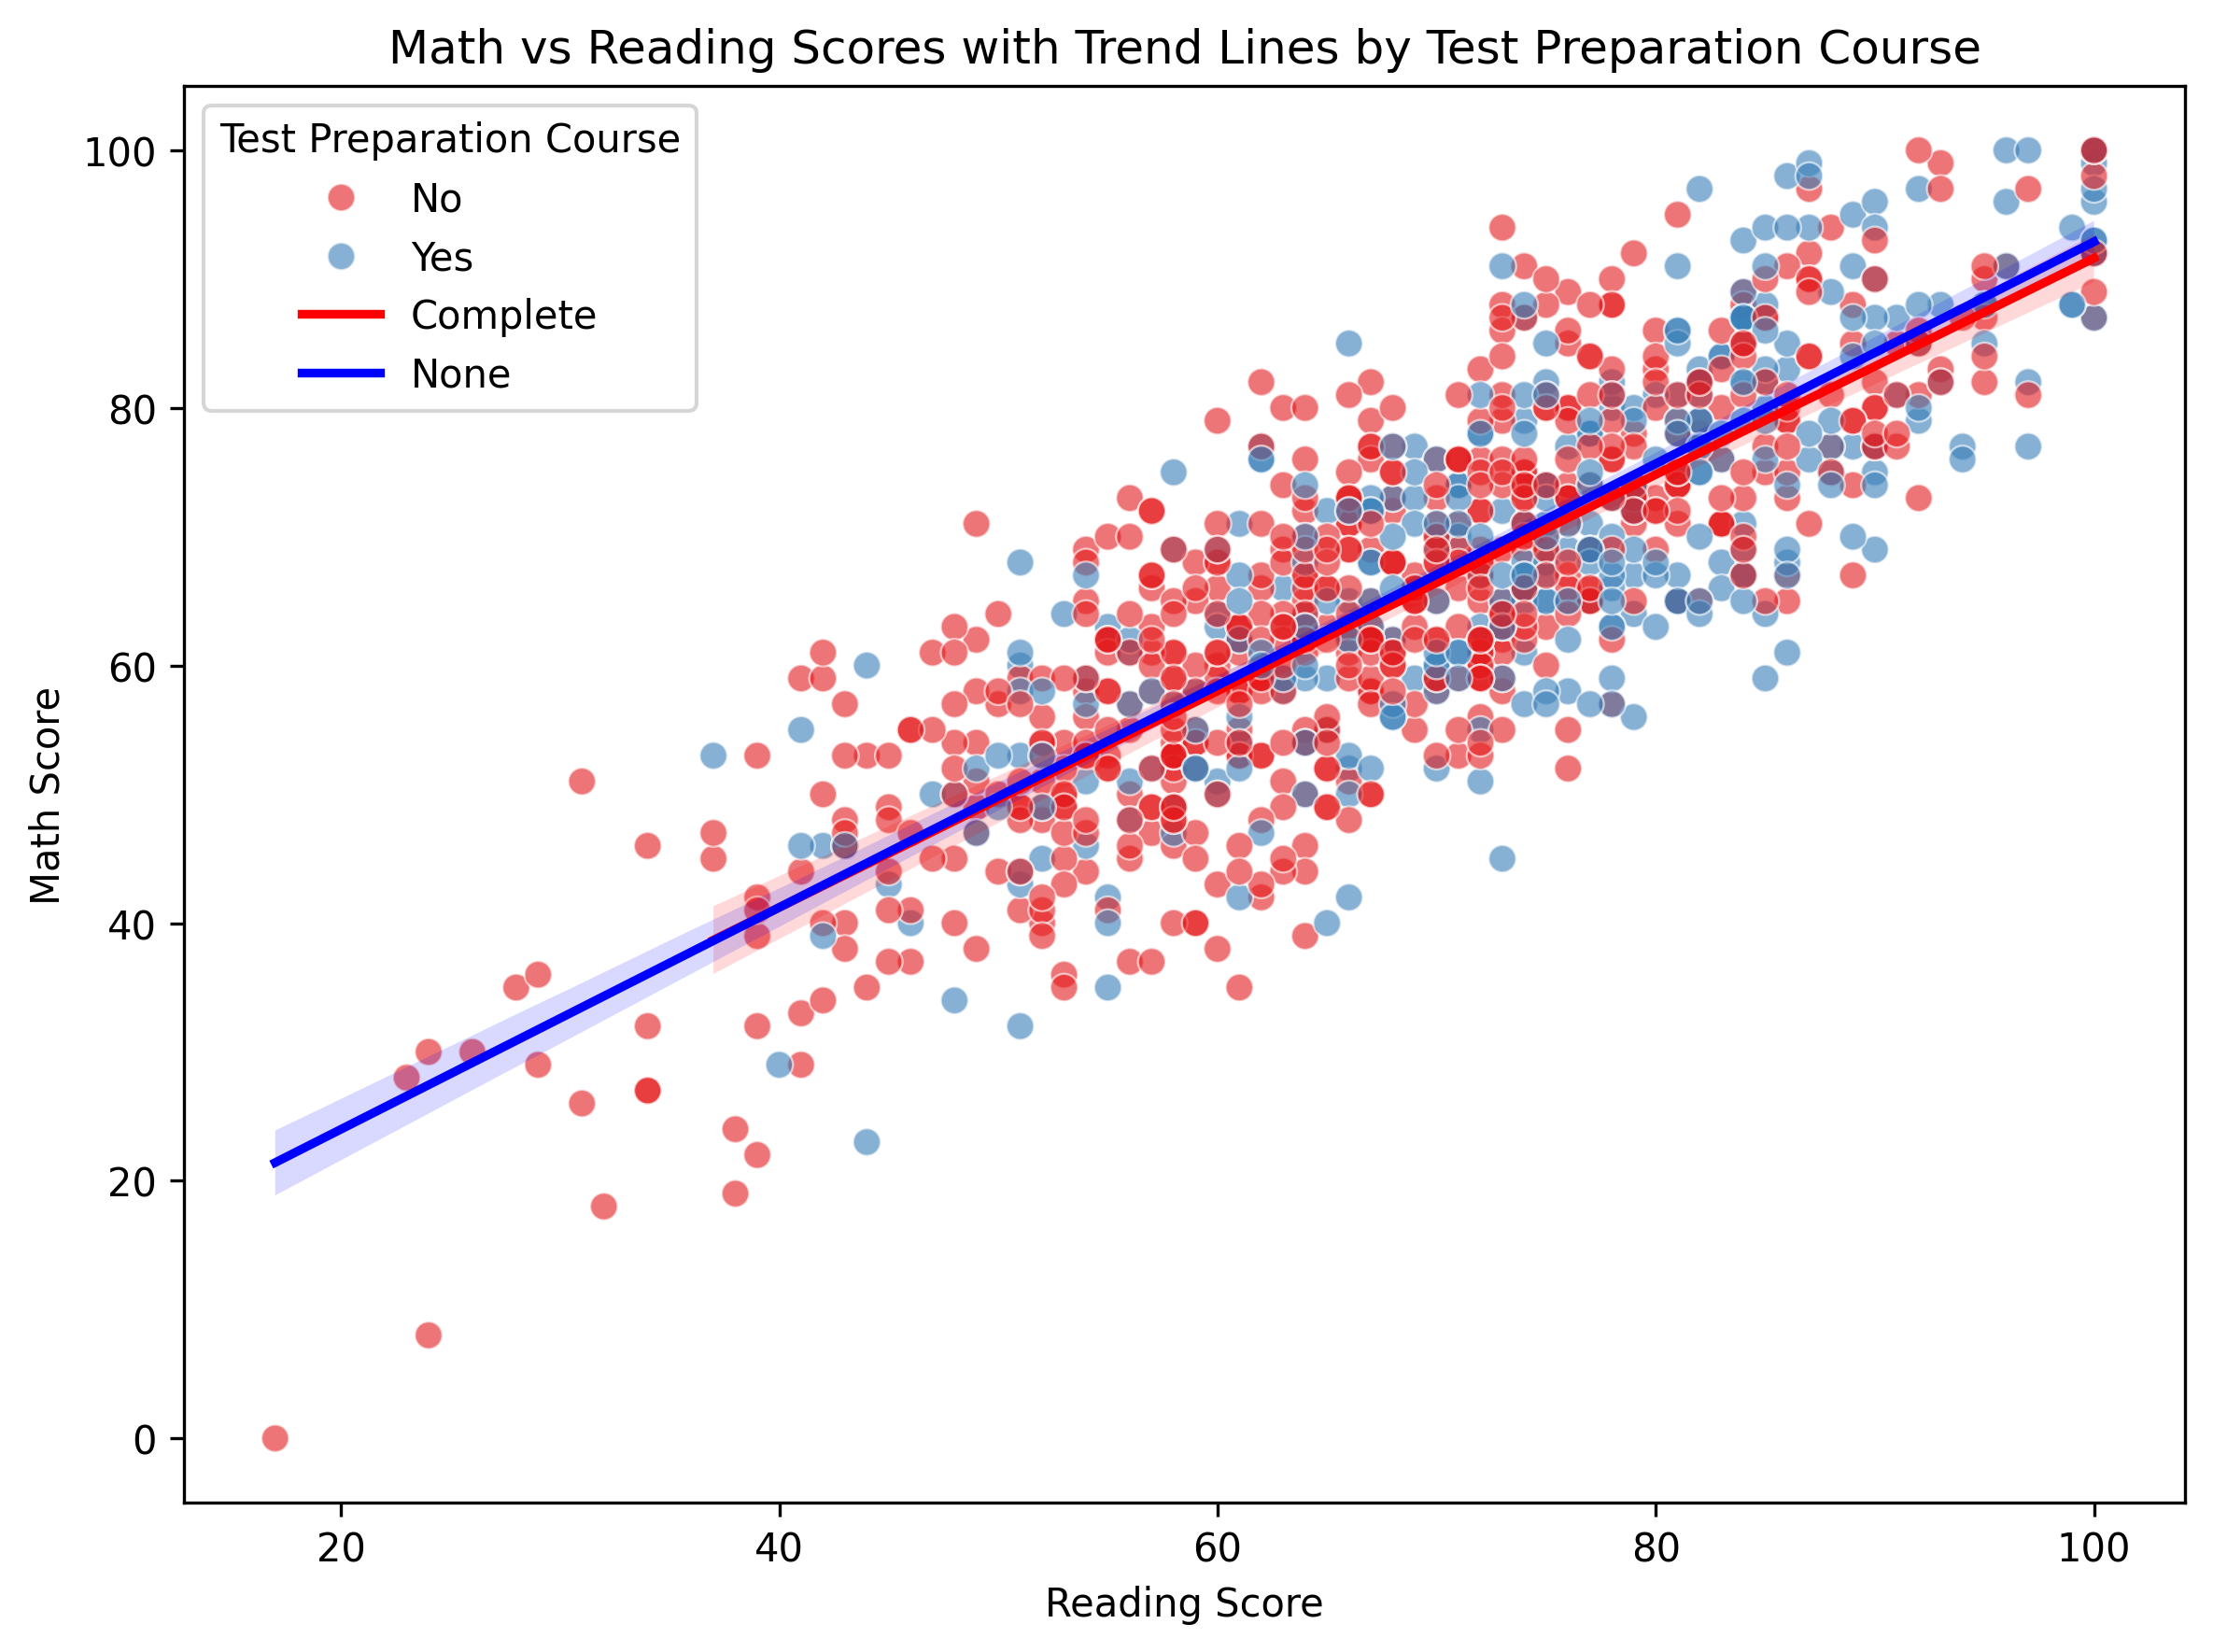

In [98]:
print("Generating: Math vs Reading with Trend Lines by Test Prep...")
plt.figure(figsize=(8, 6), dpi=300)
# Get n for each group for the legend
n_completed = df[df['Test_preparation_course'] == 'Yes'].shape[0]
n_none = df[df['Test_preparation_course'] == 'No'].shape[0]
sns.scatterplot(x='Reading_score', y='Math_score', hue='Test_preparation_course', data=df, alpha=0.6, palette='Set1', s=50)
sns.regplot(x='Reading_score', y='Math_score', data=df[df['Test_preparation_course'] == 'Yes'], scatter=False, color='red', label='Complete')
sns.regplot(x='Reading_score', y='Math_score', data=df[df['Test_preparation_course'] == 'No'], scatter=False, color='blue', label='None')
plt.title('Math vs Reading Scores with Trend Lines by Test Preparation Course')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.legend(title='Test Preparation Course')
plt.tight_layout()
plt.savefig('V5_Math_vs_Reading_with_Trend_Lines_by_Test_Prep.png') # Save the figure as V5_Math_vs_Reading_with_Trend_Lines_by_Test_Prep.png
plt.show()